Evaluating XOR Gate Behavior:
Input: [0 0] | Expected: 0 | Sigmoid Output: 0.6369, Tanh Output: -0.2862, ReLU Output: 0.2453
Input: [0 1] | Expected: 1 | Sigmoid Output: 0.7812, Tanh Output: 0.6041, ReLU Output: 1.3723
Input: [1 0] | Expected: 1 | Sigmoid Output: 0.7003, Tanh Output: -0.1853, ReLU Output: 0.0000
Input: [1 1] | Expected: 0 | Sigmoid Output: 0.8263, Tanh Output: 0.6676, ReLU Output: 0.8878


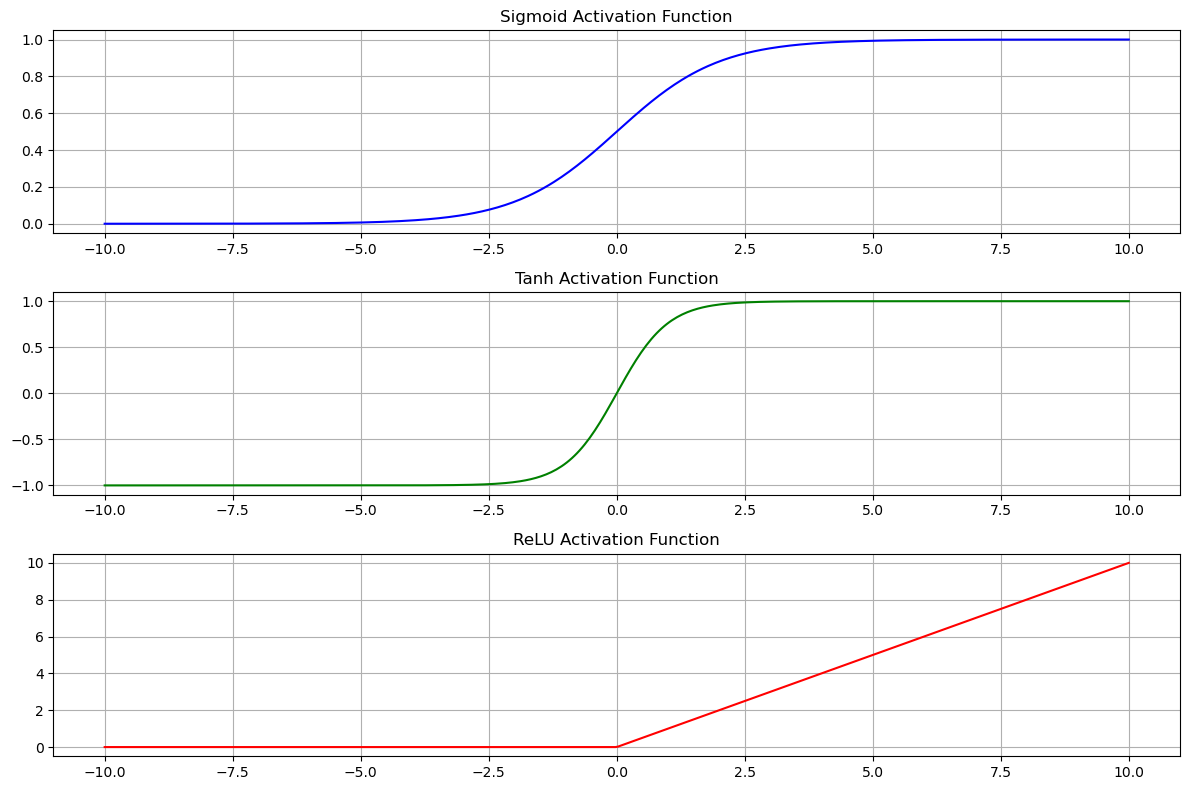

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

class Neuron:
    def __init__(self, num_inputs, activation_function='sigmoid'):
        self.weights = np.random.randn(num_inputs)
        self.bias = np.random.randn()
        
        if activation_function == 'sigmoid':
            self.activation_function = sigmoid
        elif activation_function == 'tanh':
            self.activation_function = tanh
        elif activation_function == 'relu':
            self.activation_function = relu
        else:
            raise ValueError("Unknown activation function. Use 'sigmoid', 'tanh', or 'relu'.")

    def forward(self, inputs):
        z = np.dot(inputs, self.weights) + self.bias
        output = self.activation_function(z)
        return output

xor_inputs = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

xor_outputs = np.array([0, 1, 1, 0])

neuron_sigmoid = Neuron(num_inputs=2, activation_function='sigmoid')
neuron_tanh = Neuron(num_inputs=2, activation_function='tanh')
neuron_relu = Neuron(num_inputs=2, activation_function='relu')

print("Evaluating XOR Gate Behavior:")
for i, xor_input in enumerate(xor_inputs):
    output_sigmoid = neuron_sigmoid.forward(xor_input)
    output_tanh = neuron_tanh.forward(xor_input)
    output_relu = neuron_relu.forward(xor_input)

    print(f"Input: {xor_input} | Expected: {xor_outputs[i]} | "
          f"Sigmoid Output: {output_sigmoid:.4f}, "
          f"Tanh Output: {output_tanh:.4f}, "
          f"ReLU Output: {output_relu:.4f}")

x = np.linspace(-10, 10, 400)

y_sigmoid = sigmoid(x)
y_tanh = tanh(x)
y_relu = relu(x)

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(x, y_sigmoid, label='Sigmoid', color='blue')
plt.title('Sigmoid Activation Function')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(x, y_tanh, label='Tanh', color='green')
plt.title('Tanh Activation Function')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(x, y_relu, label='ReLU', color='red')
plt.title('ReLU Activation Function')
plt.grid(True)

plt.tight_layout()
plt.show()
